In [34]:
import gymnasium as gym
import gym_BinPack3D
import numpy as np
from gym_BinPack3D.envs import Box, Rotate
from matplotlib import pyplot as plt
# %matplotlib notebook

## Game with random box sequence

In [41]:
env = gym.make('BinPack3D-v0', 
                container_size = (10, 10, 10),
                boxSeqGenerator='CUT-2', 
                enabled_rotations = [Rotate.NOOP, Rotate.XY],
                n_foreseeable_box = 1,
                box_set = [Box(1,1,1), Box(5,2,4)]
            )

using CUT-2 logic box sequence


c:\Users\bente\anaconda3\lib\site-packages\gymnasium\utils\passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (10, 10)
  logger.warn(


0.006033182503770739 False {'counter': 1, 'ratio': 0.0006033182503770739}
0.0 True {'counter': 1, 'ratio': 0.0006033182503770739}


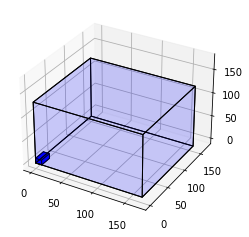

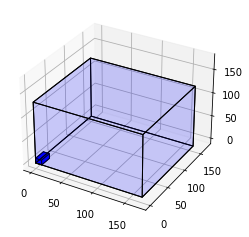

In [33]:
obs = env.reset()

for i in range(10):
    pos = ( np.random.randint(10), np.random.randint(10) )
    pos = ( 0,0 )
    pos = env.position_to_actionIdx(pos)
    rot = Rotate.NOOP
    action = (pos, rot)

    obs, reward, done, done2, info = env.step(action)
    print(reward,done,info)
    
    if done: break
        
env.render()

300

0.0 True {'counter': 1, 'ratio': 0.012066365007541479}
{'height_map': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 'coming_boxes': array([[10., 20., 10.]], dtype=float32), 'valid_placement_mask': array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=int8)}


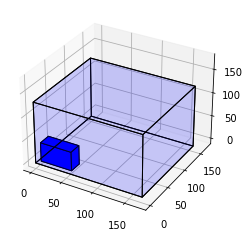

In [20]:
for i in range(10):
    pos = ( np.random.randint(10), np.random.randint(10) )
    #pos = ( 0,0 )
    pos = env.position_to_actionIdx(pos)
    rot = Rotate.NOOP
    action = (pos, rot)

    obs, reward, done, done2, info = env.step(action)
    print(reward,done,info)
    
    if done: break

env.render()
print(obs)

## Game with box sequence generated by "CUT-2"

In [12]:
env = gym.make('BinPack3D-v0', 
                container_size = (9, 11, 13),
                boxSeqGenerator='CUT-2', 
                enabled_rotations = [Rotate.NOOP],
                n_foreseeable_box = 3,
                minSideLen = 2,
                maxSideLen = 5,
            )

using CUT-2 logic box sequence


c:\Users\bente\anaconda3\lib\site-packages\gymnasium\utils\passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (3, 3)
  logger.warn(
c:\Users\bente\anaconda3\lib\site-packages\gymnasium\utils\passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (9, 11)
  logger.warn(


0.09324009324009325 False {'counter': 1, 'ratio': 0.009324009324009324}
0.13986013986013987 False {'counter': 2, 'ratio': 0.023310023310023312}
0.06216006216006216 False {'counter': 3, 'ratio': 0.029526029526029528}
0.06216006216006216 False {'counter': 4, 'ratio': 0.035742035742035744}
0.09324009324009325 False {'counter': 5, 'ratio': 0.045066045066045064}
0.06216006216006216 False {'counter': 6, 'ratio': 0.05128205128205128}
0.1864801864801865 False {'counter': 7, 'ratio': 0.06993006993006994}
0.12432012432012432 False {'counter': 8, 'ratio': 0.08236208236208237}
0.1554001554001554 False {'counter': 9, 'ratio': 0.0979020979020979}
0.24864024864024864 False {'counter': 10, 'ratio': 0.12276612276612277}
0.12432012432012432 False {'counter': 11, 'ratio': 0.1351981351981352}
0.6216006216006216 False {'counter': 12, 'ratio': 0.19735819735819735}
0.1864801864801865 False {'counter': 13, 'ratio': 0.216006216006216}
0.46620046620046623 False {'counter': 14, 'ratio': 0.26262626262626265}
0.46

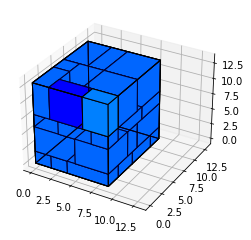

In [14]:
obs = env.reset()

while True:
    # we cheat the game by look at cut process info and get the 
    # correct pos to place box, achieving perfect packing
    box = env.boxSeqGenerator.next_N_boxes()[0]
    pos = (box.x,box.y)
    pos = env.position_to_actionIdx(pos)
    rot = Rotate.NOOP
    action = (pos, rot)

    obs, reward, done, done2, info = env.step(action)
    print(reward,done,info)
    
    if done: break
        
env.render()
print(obs)